Вы уже умеете присоединять строки друг к другу путём добавления столбцов «сбоку» — с помощью различных видов JOIN.


А что, если нам необходимо присоединить несколько результатов «снизу», так чтобы получить общий результат в выводе?


Ответу на этот вопрос и посвящён текущий модуль.

братите внимание! Вы можете посмотреть подробный разбор структуры предлагаемых запросов во вкладке Детализация.

Но прежде, как всегда, разберёмся с датасетом.


В данном блоке мы будем работать с данными о компании, организующей перевозки грузов.


 Заглянем в Metabase!

Интересующие нас данные хранятся в таблицах city, customer, driver, shipment, truck. Давайте внимательно их изучим.

Ниже представлена ER-диаграмма (от англ. entity-relation, дословно:

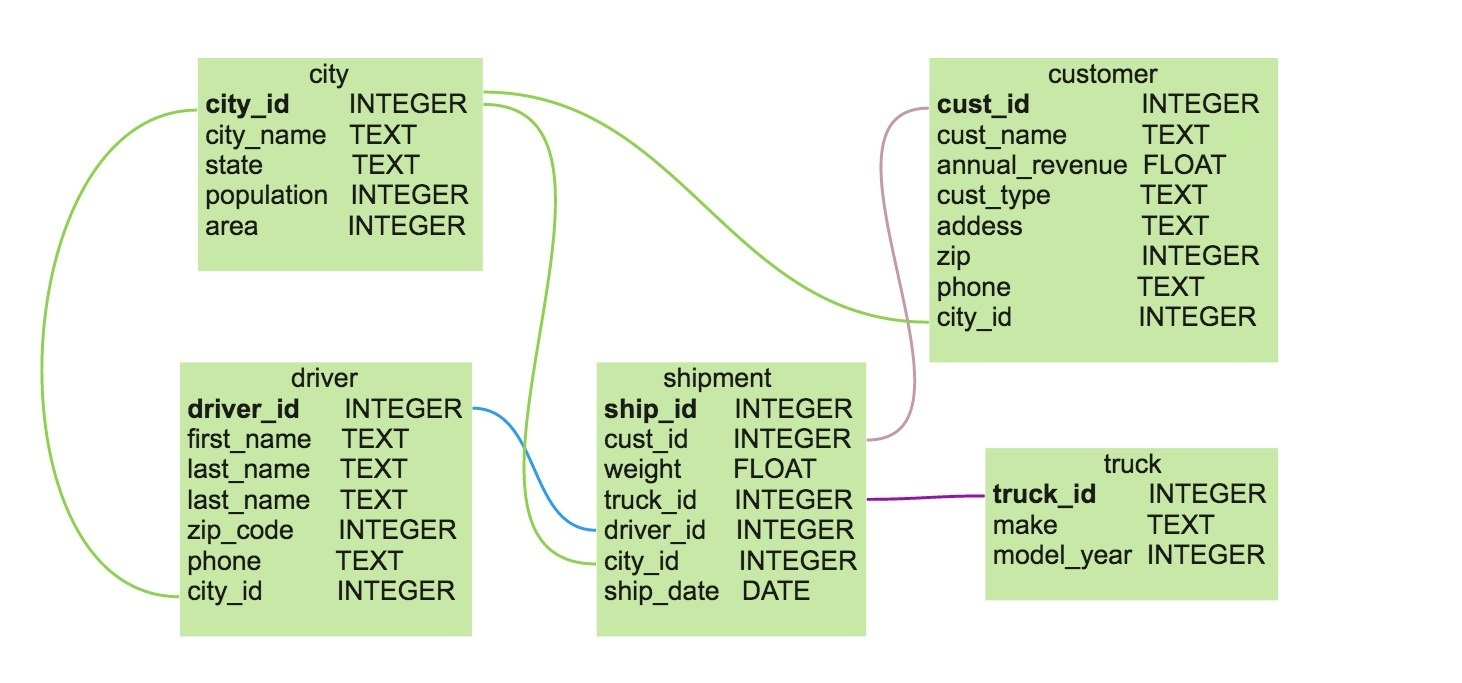

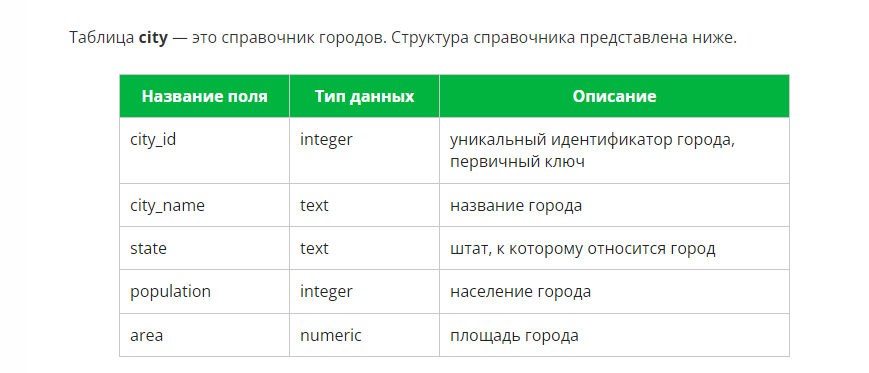

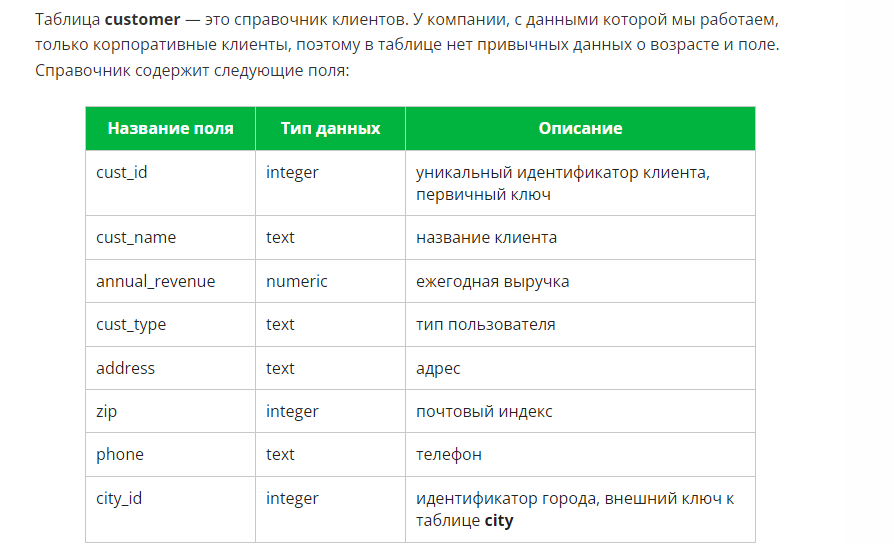

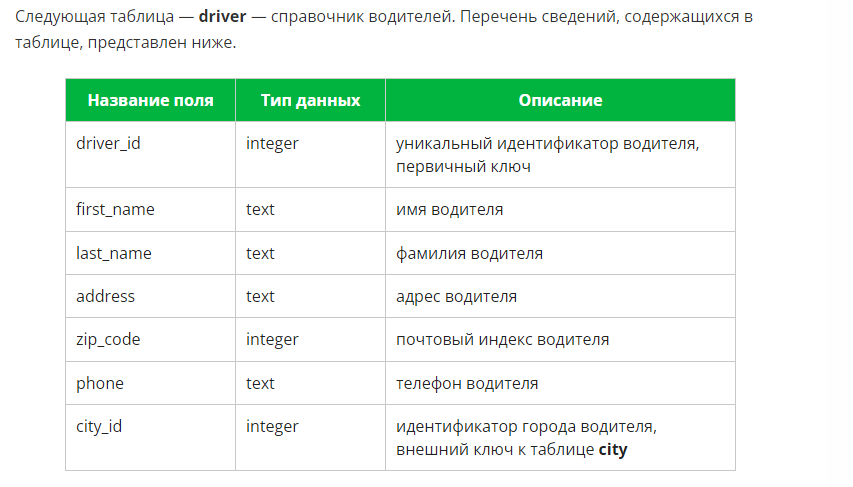

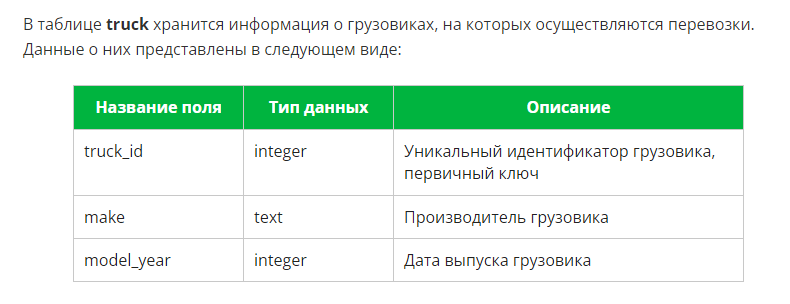

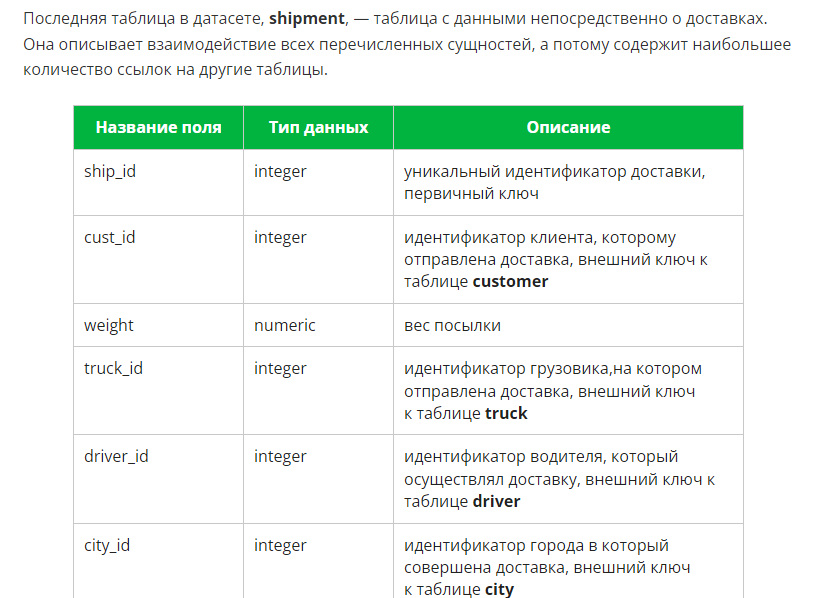

Укажите название города с максимальным весом единичной доставки

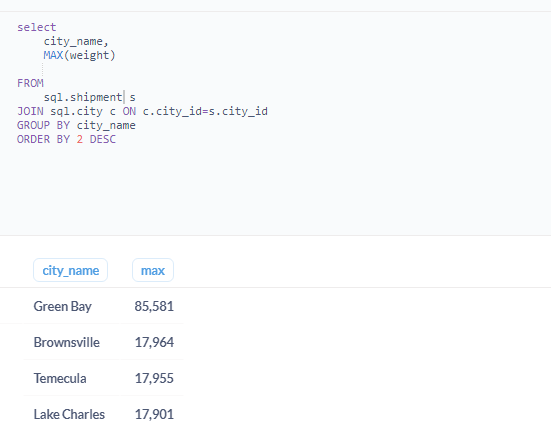

Вернёмся к центральному вопросу модуля: как соединить несколько результатов, чтобы получить в выводе один общий?



Допустим, мы хотим собрать из справочников по книгам и фильмам один, так чтобы в нём содержались названия произведений, а также их описание — книга или фильм.

Для этого напишем простой запрос:

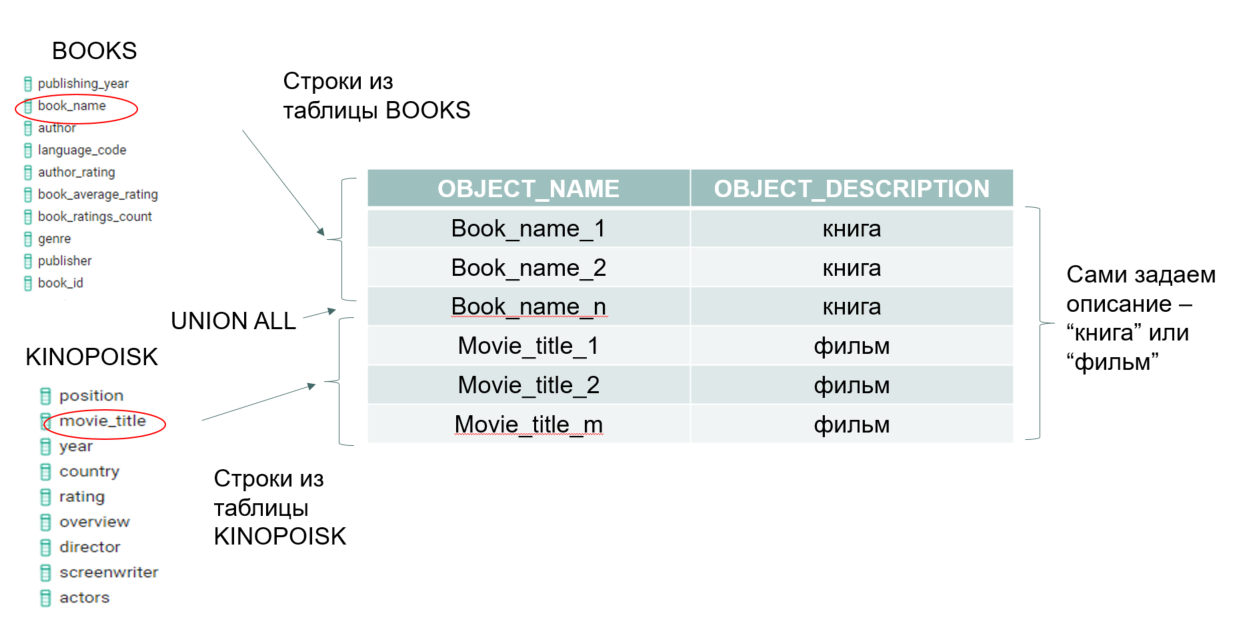

В запросе мы использовали оператор UNION ALL — он присоединяет любой результат запроса к другому «снизу» при условии, что у них одинаковая структура, а именно:

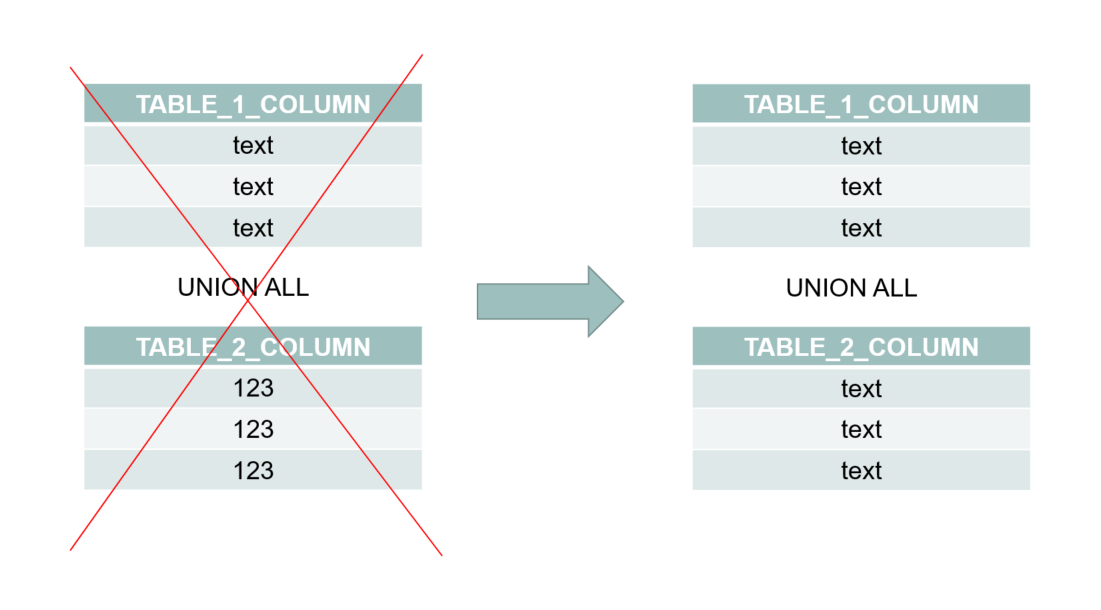

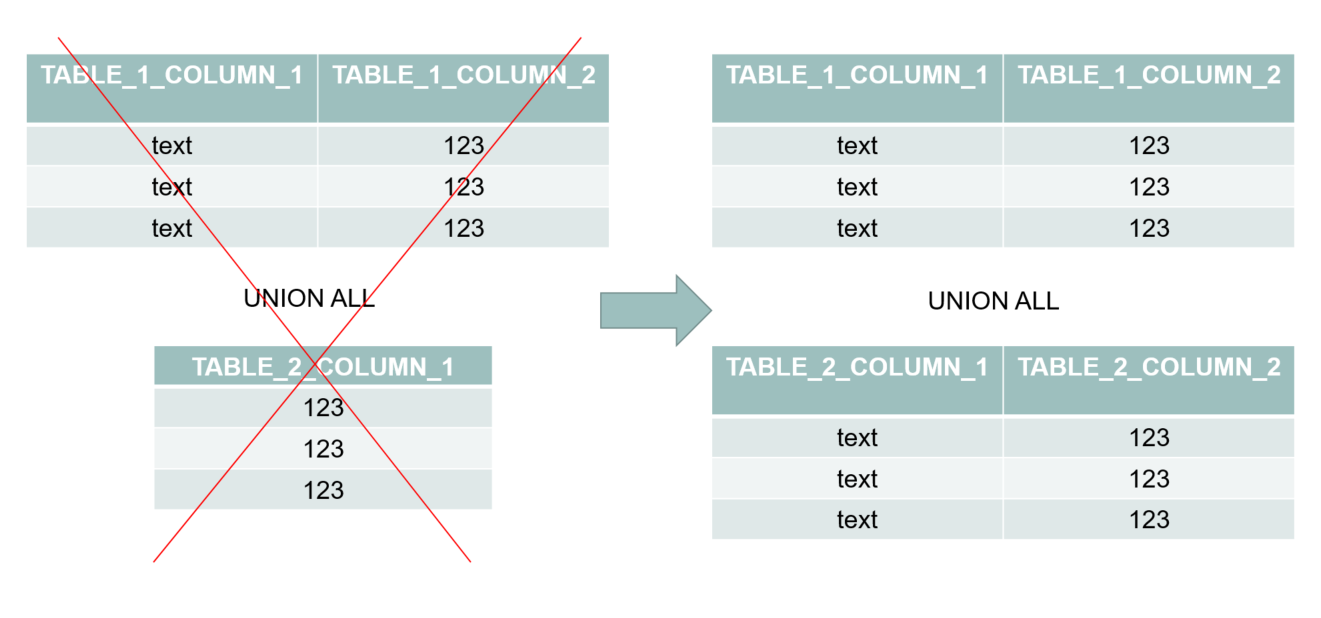

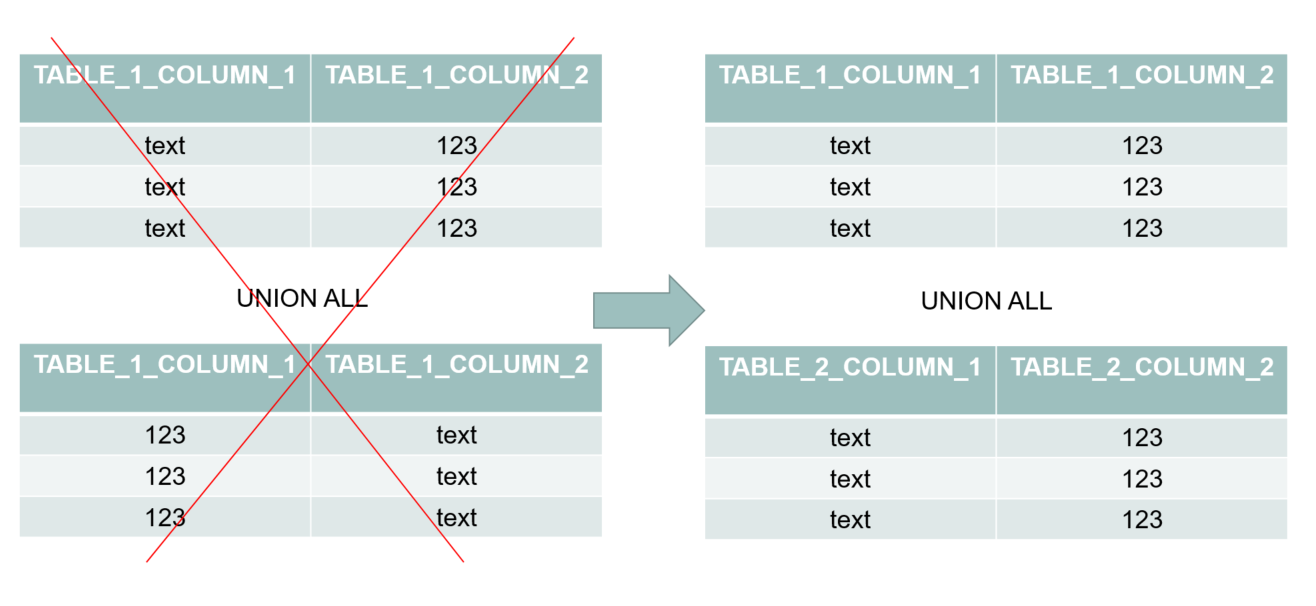

Оператор присоединения существует в двух вариантах:

→ UNION выводит только уникальные записи;
→ UNION ALL присоединяет все строки последующих таблиц к предыдущим, без ограничений по уникальности.

Важно! UNION оставляет только уникальные значения, а потому требует дополнительных вычислительных мощностей и памяти (в данном случае можно провести аналогию с DISTINCT). Поэтому если вы уверены в отсутствии дубликатов в данных или они вам не важны, предпочтительнее использовать UNION ALL.
Проверить, как различаются операторы, вы сможете при выполнении заданий 4.2.1 и 4.3.1.

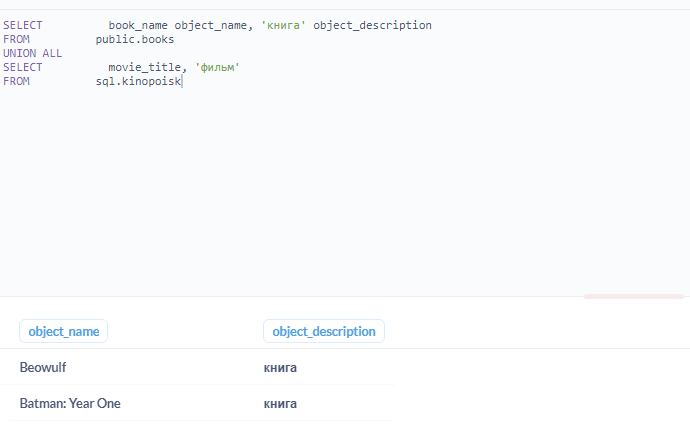

Оператор присоединения существует в двух вариантах:

→ UNION выводит только уникальные записи;

→ UNION ALL присоединяет все строки последующих таблиц к предыдущим, без ограничений по уникальности.

Важно! UNION оставляет только уникальные значения, а потому требует дополнительных вычислительных мощностей и памяти (в данном случае можно провести аналогию с DISTINCT). Поэтому если вы уверены в отсутствии дубликатов в данных или они вам не важны, предпочтительнее использовать UNION ALL.
Проверить, как различаются операторы, вы сможете при выполнении заданий 4.2.1 и 4.3.1.

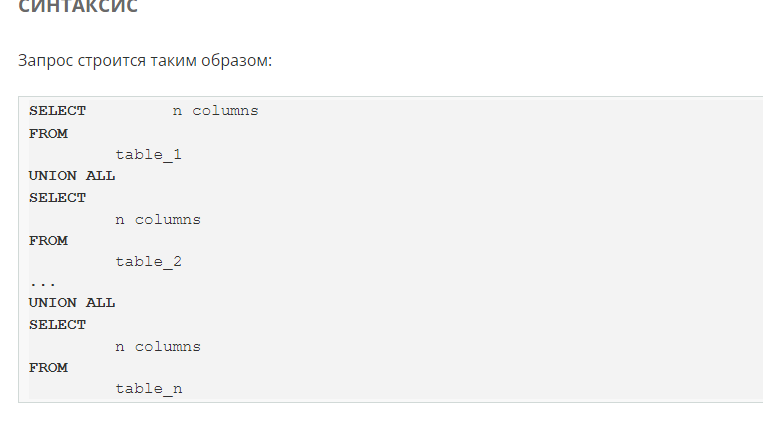

Пришла пора испытать функцию UNION(ALL) на практике.

Обратимся к нашему датасету о транспортной компании и посмотрим, как сформировать справочник с ID всех таблиц и указанием объекта, к которому он относится.

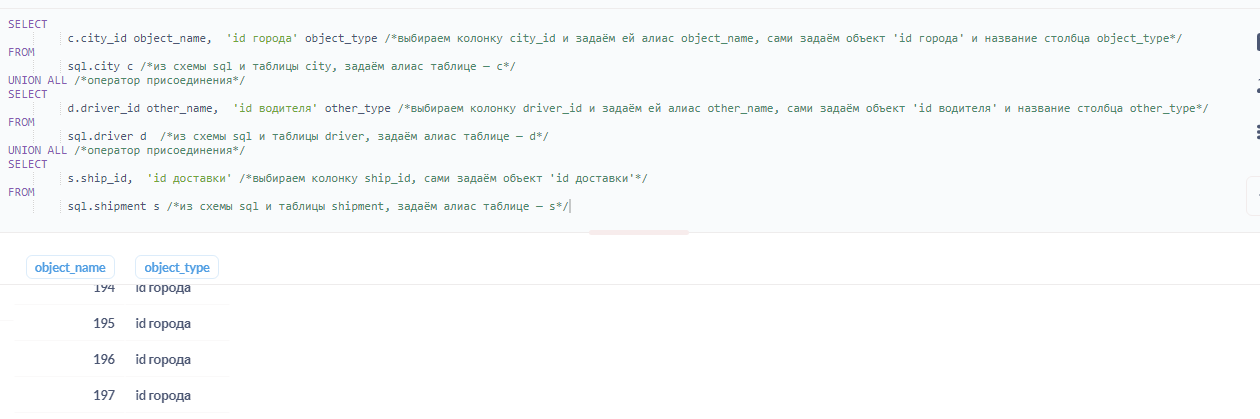

Обратите внимание! Несмотря на исходные названия колонок other_name и other_type во втором подзапросе, в выводе получим названия, которые мы дали в первом блоке: object_name и object_type.
Другая особенность — в применении сортировки ORDER BY: она всегда будет относиться к итоговому результату всего запроса с UNION ALL.

В тех случаях, когда необходимо применить команду ORDER BY или LIMIT не к итоговому результату, а к каждой части запроса, можно обернуть подзапросы в скобки.

Чтобы посмотреть, как это работает, вернёмся к нашему примеру с общим справочником по фильмам и книгам.

Мы уже знаем, что можно легко и непринуждённо применить операторы ORDER BY и LIMIT ко всему результату запроса.

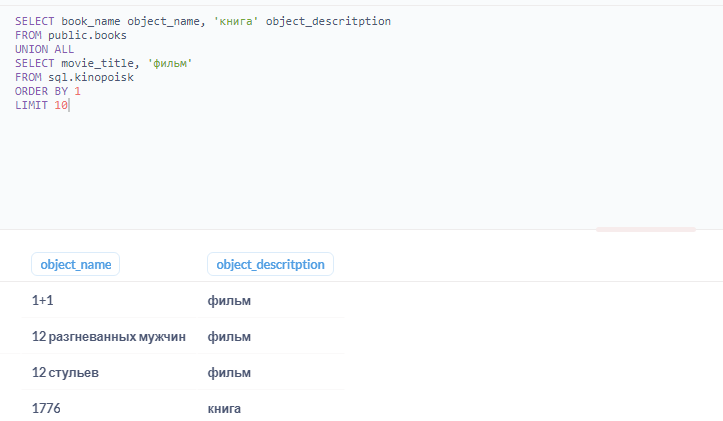

Всё бы хорошо, только в таком случае отсортирован будет весь общий справочник, а в выводе останется одна строка с названием объекта, идущим первым по алфавиту.

А если мы не хотим общую сортировку? Может, нам нужны строки с названием как фильма, так и книги, идущих первыми по алфавиту.

Нет ничего проще — отсортируем каждую часть запроса по отдельности и объединим результаты!

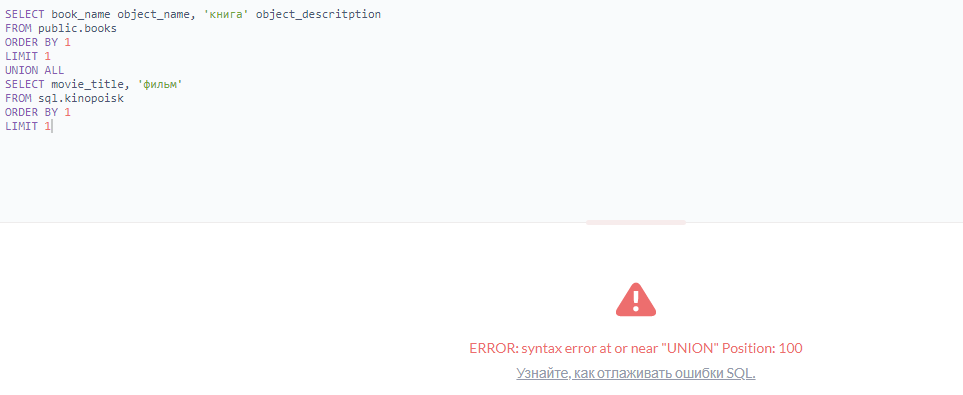

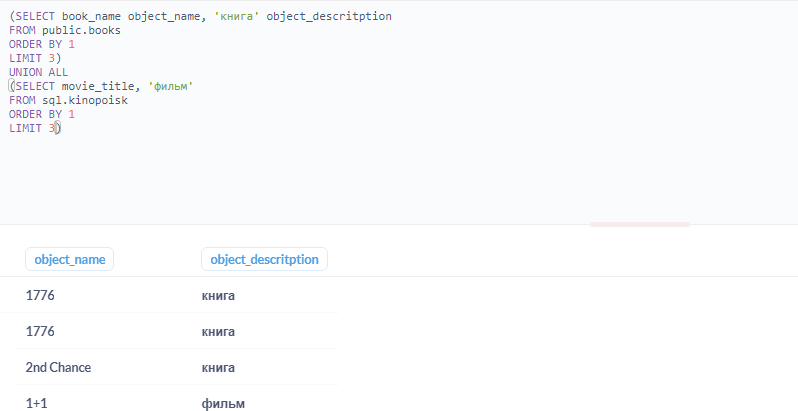

Напишите запрос, который создает уникальный алфавитный справочник всех городов, штатов, имён водителей и производителей грузовиков. Результатом запроса должны быть два столбца: название и тип объекта (city, state, driver, truck). Отсортируйте список по названию объекта, а затем — по типу.

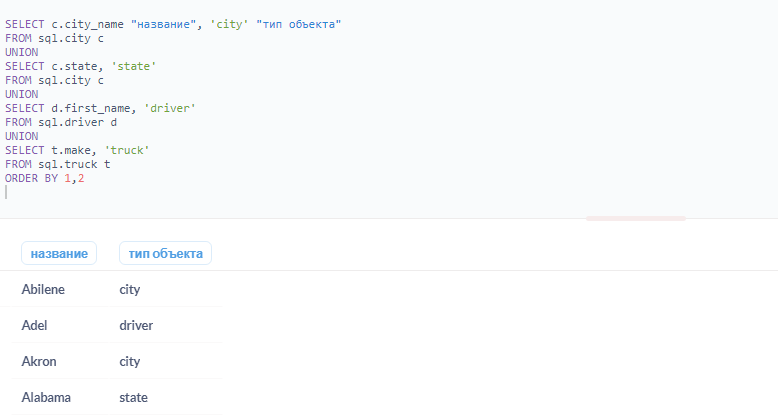

Напишите запрос, который соберёт имена всех упомянутых городов и штатов из таблицы city. Результатом запроса должен быть один столбец object_name, отсортированный в алфавитном порядке.

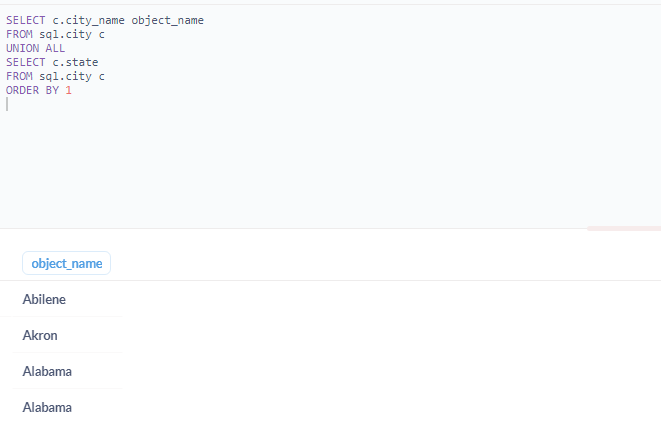

Выполнив предыдущий запрос, мы получили города с одинаковыми названиями, но находящиеся в разных штатах, а также большое количество дублирующихся названий штатов. Перепишите предыдущий запрос так, чтобы остались только уникальные названия городов и штатов. Результатом запроса должен быть один столбец object_name, отсортированный в алфавитном порядке.

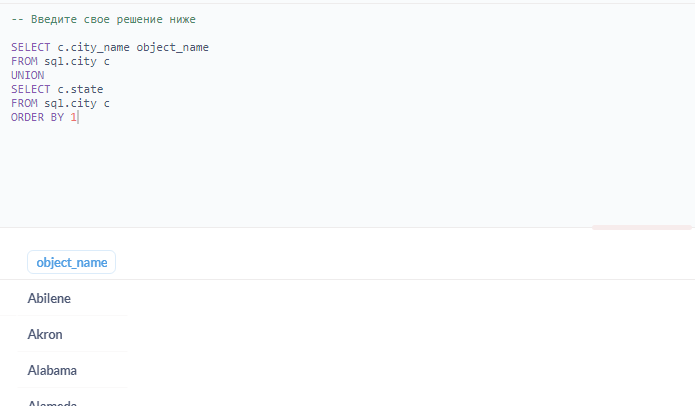

Если мы всё же хотим выполнить поставленную задачу, придётся привести оба столбца к одному типу данных. Не каждый текст может быть приведён к числу, зато каждое число может быть представлено в текстовом формате.


Забегая вперёд, скажем пару слов о типизации столбцов. Для типизации в Postgres составляется запрос по модели column_name::column_type.


Таким образом, чтобы перевести city_id в текст, нам потребуется написать city_id::text.


Важно! Любой тип данных может быть приведён к текстовому формату — эту возможность целесообразно использовать для соединения разнородных сущностей. Главное — помнить, что сортировка текста отличается от сортировки чисел и дат.

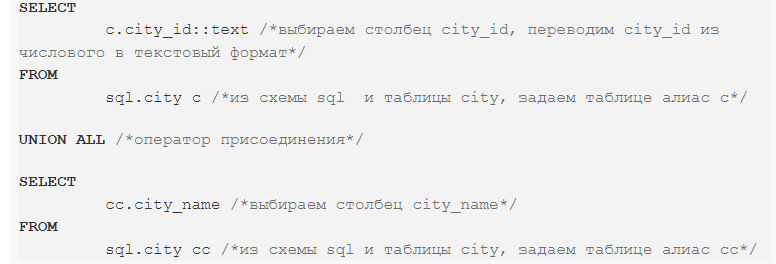

Напишите запрос, который объединит в себе все почтовые индексы водителей и их телефоны в единый столбец-справочник contact. Также добавьте столбец с именем водителя first_name и столбец contact_type с типом контакта (phone или zip в зависимости от типа). Отсортируйте список по столбцу с контактными данными в порядке возрастания, а затем — по имени водителя.

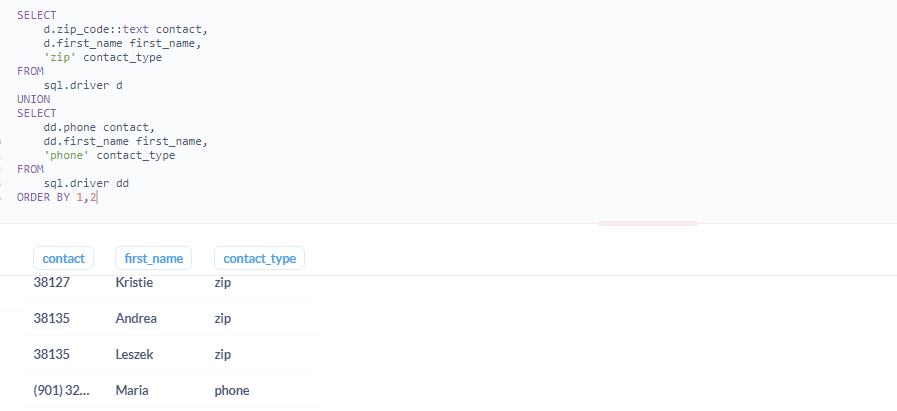

Помимо соединения разнородных сущностей в единый справочник, UNION ALL часто используется для подведения промежуточных итогов и выведения результатов агрегатных функций.

Кроме агрегатных функций, в запросах с UNION могут использоваться функции группировки и выборки.

Посмотреть скринкаст
Попробуем вывести обобщённые данные о населении по всем городам, с детализацией до конкретного города.

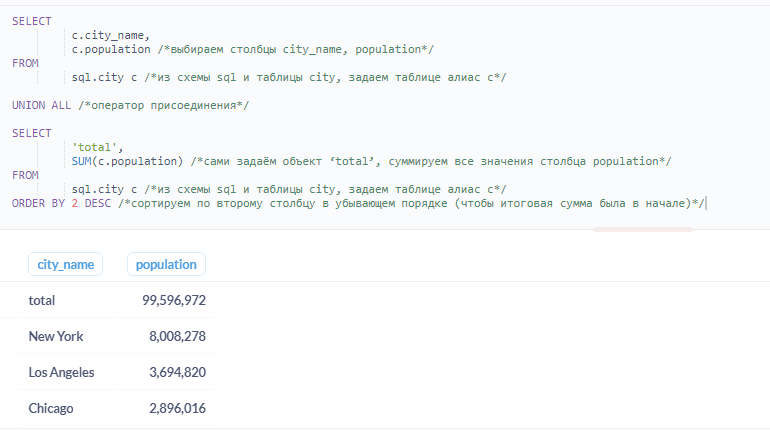

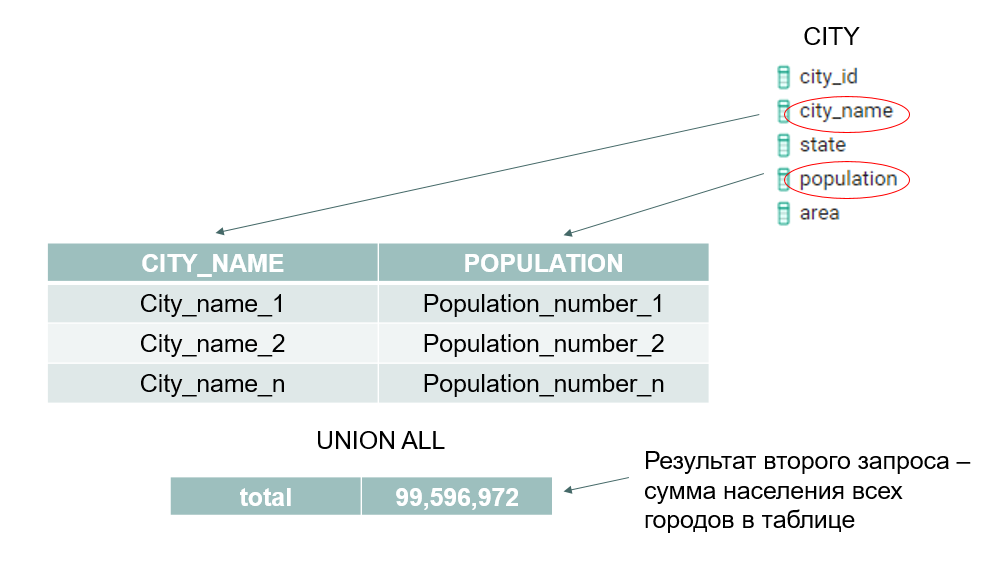

Выполнив запрос в Metabase, вы заметите, что сначала выведен итоговый результат с суммой населения всех городов в таблице, а затем по каждому городу в отдельности.

Напишите запрос, который выводит общее число доставок total_shipments, а также количество доставок в каждый день. Необходимые столбцы: date_period, cnt_shipment. Не забывайте о единой типизации. Упорядочите по убыванию столбца date_period.

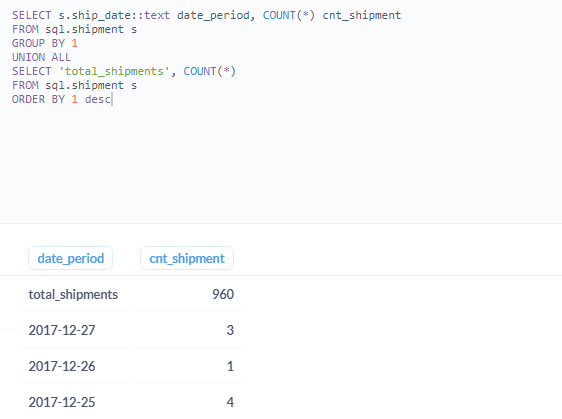

UNION также может быть использован для разделения существующей выборки по критерию «выполнение определённого условия».

Например, с помощью UNION можно отобразить, у кого из водителей заполнен столбец с номером телефона.

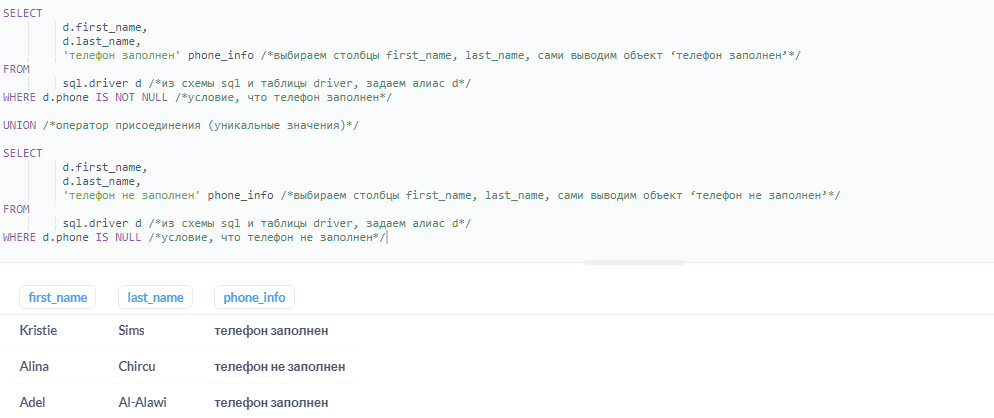

Напишите запрос, который выведет все города и штаты, в которых они расположены, а также информацию о том, была ли осуществлена доставка в этот город:

если в город была осуществлена доставка, то выводим 'доставка осуществлялась';
если нет — выводим 'доставка не осуществлялась'.
Столбцы к выводу: city_name, state, shipping_status. Отсортируйте в алфавитном порядке по городу, а затем — по штату.

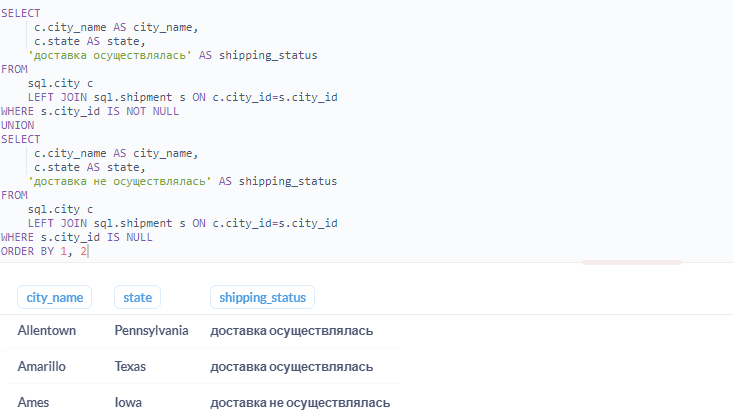

Напишите запрос, который выводит два столбца: city_name и shippings_fake. Выведите города, куда совершались доставки. Пусть первый столбец содержит название города, а второй формируется так:

если в городе было более десяти доставок, вывести количество доставок в этот город как есть;
иначе — вывести количество доставок, увеличенное на пять.
Отсортируйте по убыванию получившегося «нечестного» количества доставок, а затем — по имени в алфавитном порядке.

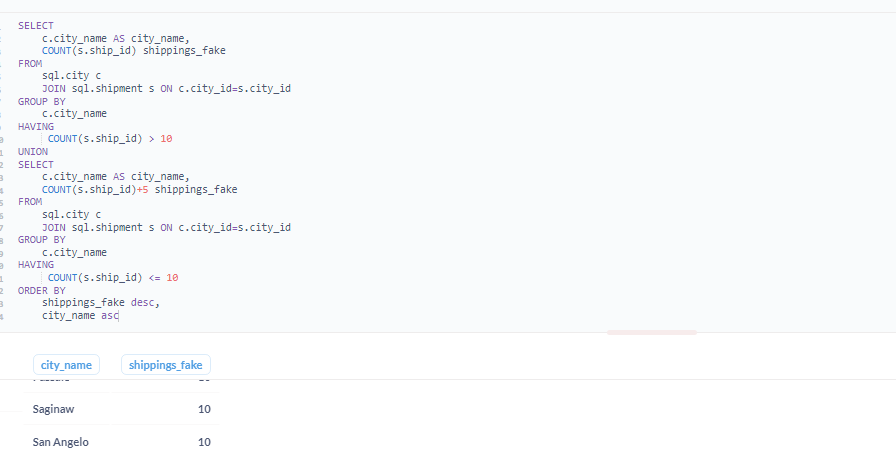

UNION можно использовать для создания справочников прямо в коде запроса. К примеру, если мы хотим вручную ввести какие-то значения и произвести с ними некоторые манипуляции или дополнить существующую выдачу своими значениями.

Посмотреть скринкаст
Составим запрос, который позволит вывести первые три буквы алфавита и их порядковые номера.

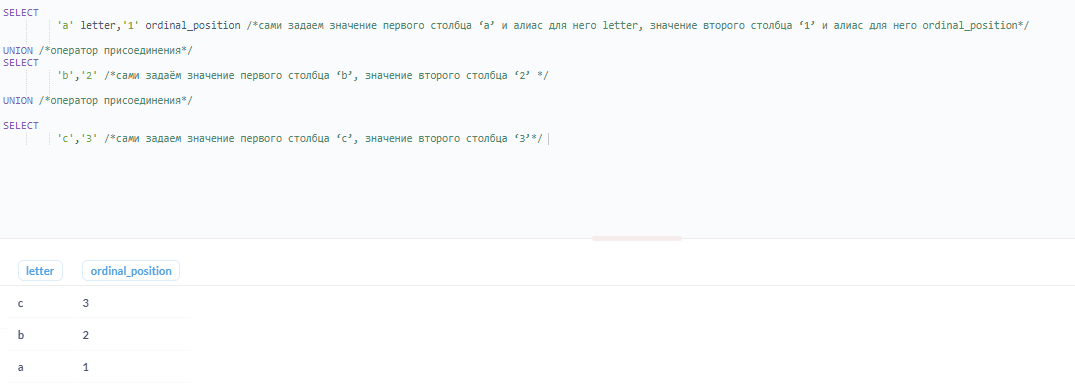

Существуют сложные алгоритмы сравнения текстовых значений, но главный смысл сводится к одному: сравнение производится на основе таблицы unicode и позиции элемента в ней с учётом определённых условий.

Упражнения ниже помогут увидеть разницу в сравнении числовых и текстовых значений.

Напишите запрос, который выберет наибольшее из значений:

1000000;
541;
-500;
100.
Столбец с результатом назовите result.

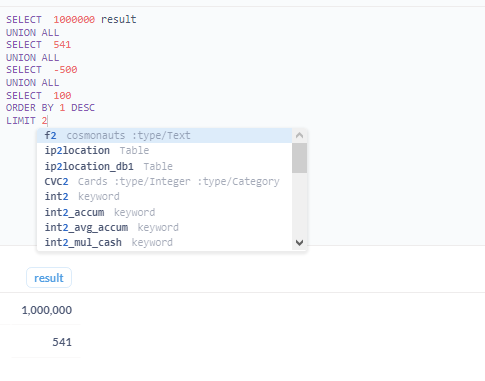

Помним, что сортировка для числовых и строковых типов данных отличается. Построив запрос по аналогии с примером, приведите значения к текстовому типу данных, сравните и выберите наибольшее из них:

1000000;
541;
-500;
100.
Столбец с ответом назовите mycol

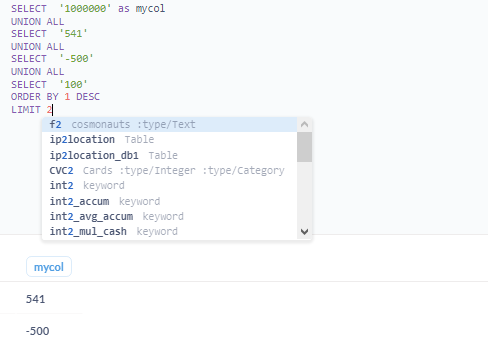

Предположим, нам нужно узнать, в какие города осуществлялась доставка, за исключением тех, в которых проживают водители.

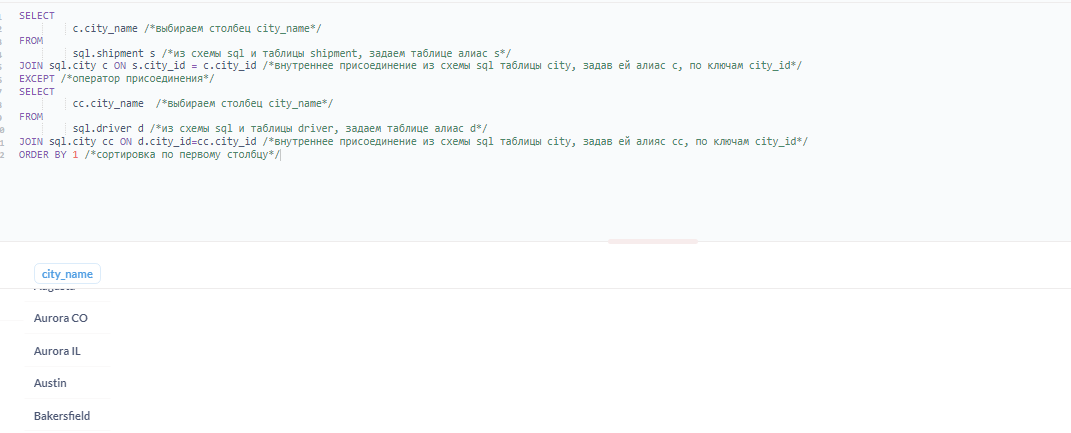

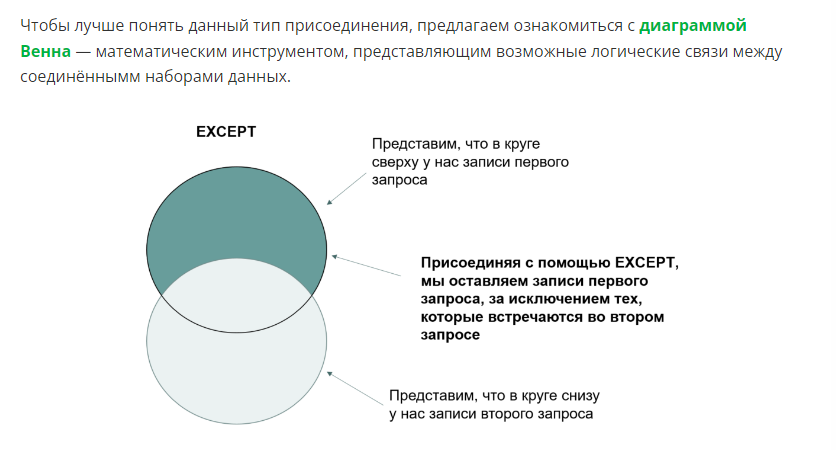

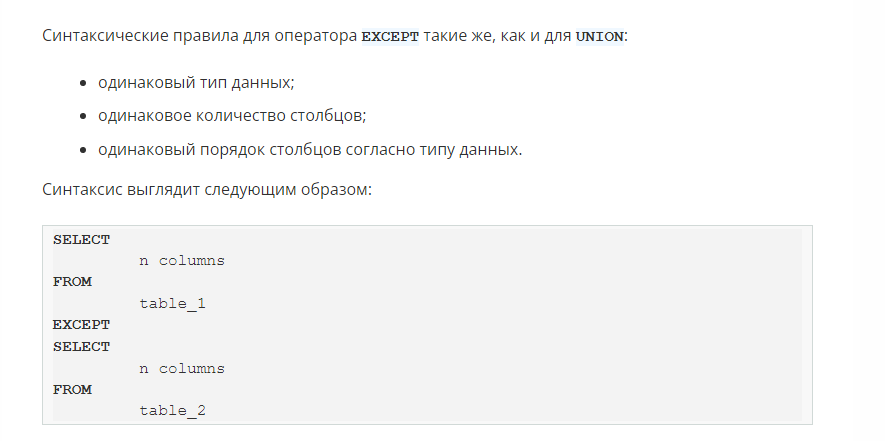

Мы уже знаем, как решить такую задачу с использованием LEFT JOIN. Вариант с EXCEPT будет полезен в тех случаях, когда у вас много столбцов и вам не хочется прописывать их равенство в условии для JOIN.

Предположим, у нас есть информация о продажах канцелярского магазина за май и июнь.

Какие-то позиции продавались и в том, и в другом месяце, а какие-то — только в одном. Использовав EXCEPT, мы можем оставить только те товары, которые есть в первом запросе (например, за май), но отсутствуют во втором запросе (например, за июнь).

Графически действие оператора можно представить следующим образом:

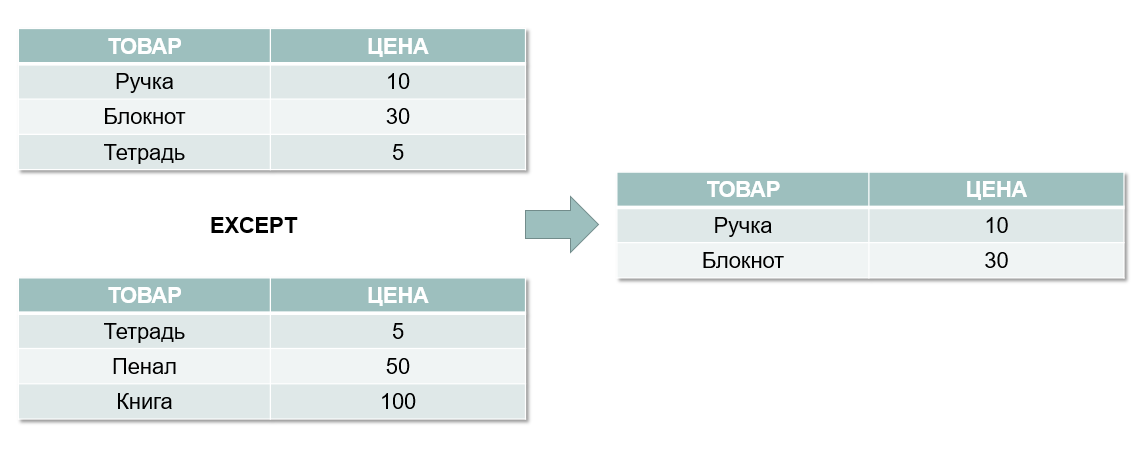

Выведите список zip-кодов, которые есть в таблице sql.driver, но отсутствуют в таблице sql.customer. Отсортируйте по возрастанию, столбец к выводу — zip. В поле ниже введите запрос, с помощью которого вы решили эту задачу.

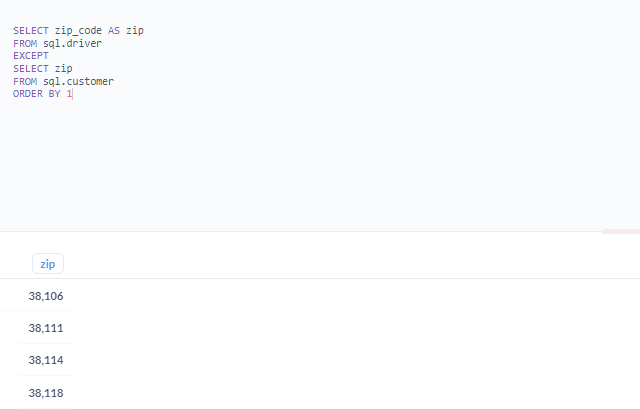

А что если нам надо вывести общие записи — те, что существуют в нескольких таблицах?



Предположим, нам надо вывести совпадающие по названию города и штаты.

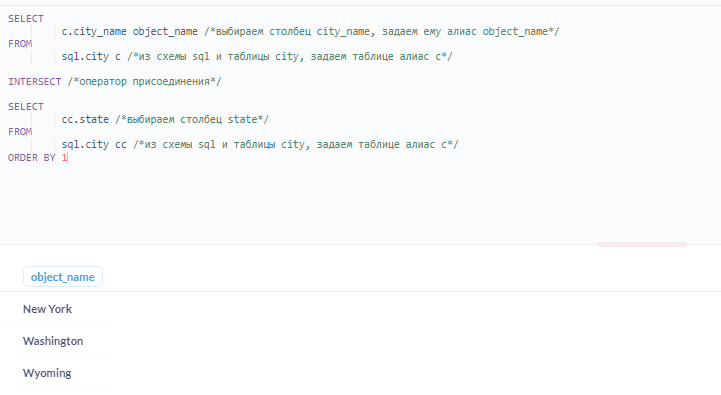

Как видим, с помощью оператора INTERSECT мы вывели названия городов и штатов, которые совпадают: New York, Washington и Wyoming. Присмотримся к нему внимательнее.

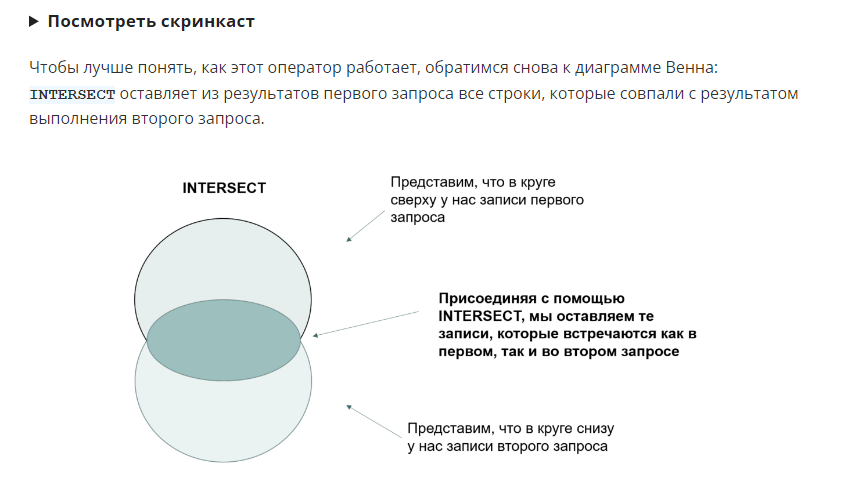

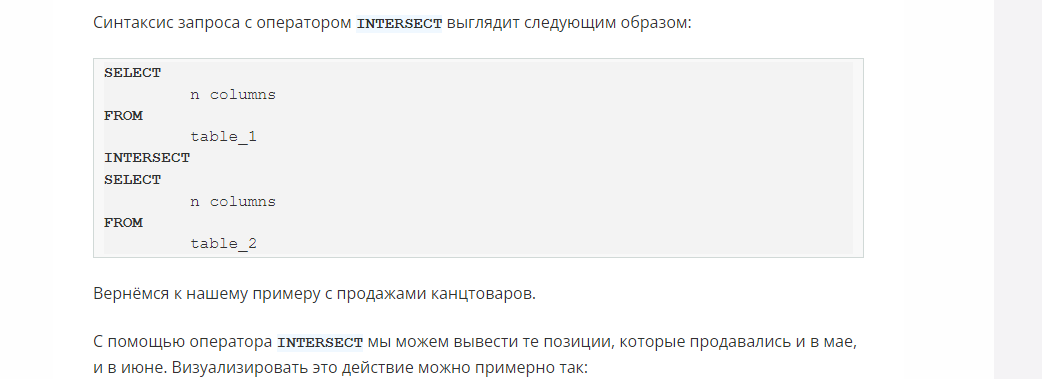

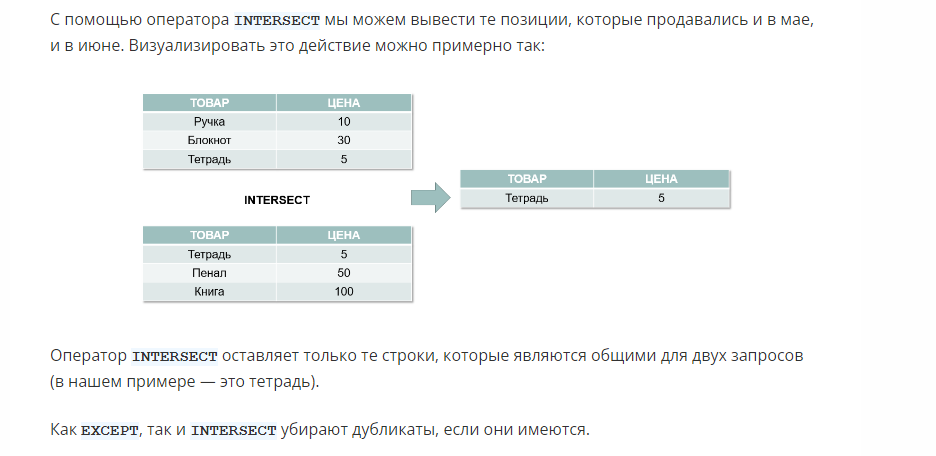

Напишите запрос, который выведет список id городов, в которых есть и клиенты, и доставки, и водители.

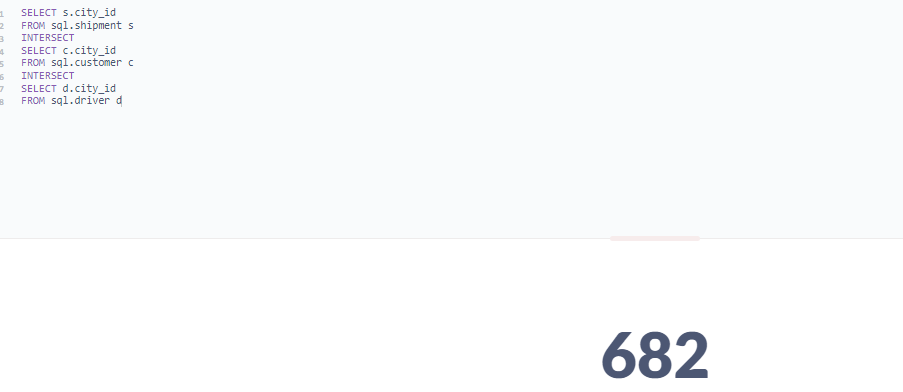

Выведите zip-код, который есть как в таблице с клиентами, так и в таблице с водителями.

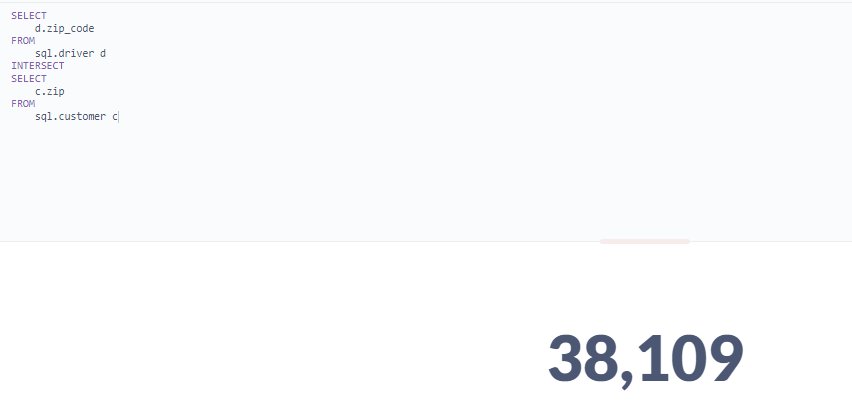

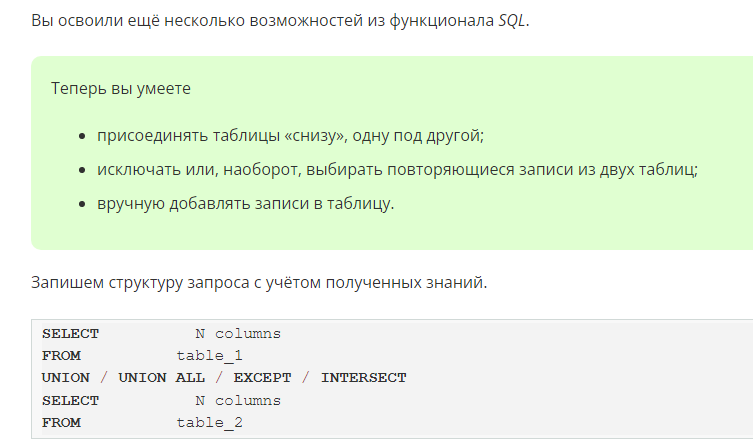

Выведите города с максимальным и минимальным весом единичной доставки. Столбцы к выводу — city_name, weight.

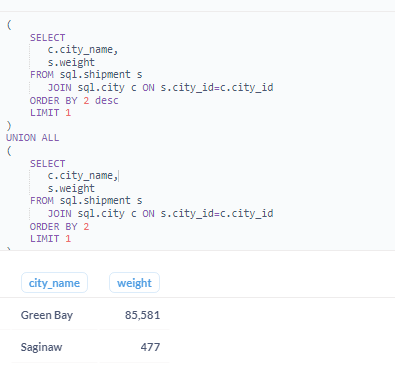

Выведите идентификационные номера клиентов (cust_id), которые совпадают с идентификационными номерами доставок (ship_id). Столбец к выводу — mutual_id. Отсортируйте по возрастанию.

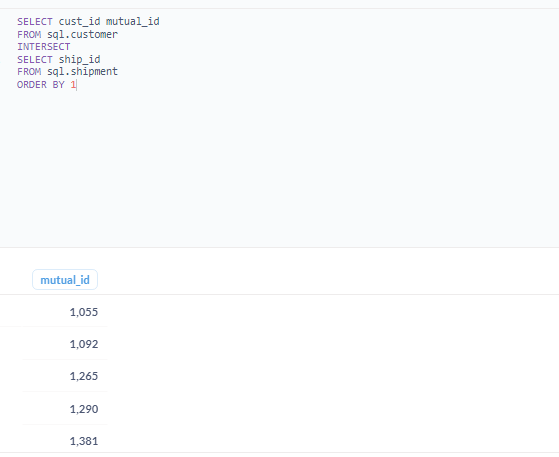

Создайте справочник, содержащий уникальные имена клиентов, которые являются производителями (cust_type='manufacturer'), и производителей грузовиков, а также описание объекта — 'КЛИЕНТ' или 'ГРУЗОВИК'. Столбцы к выводу — object_name, object_description. Отсортируйте по названию в алфавитном порядке.

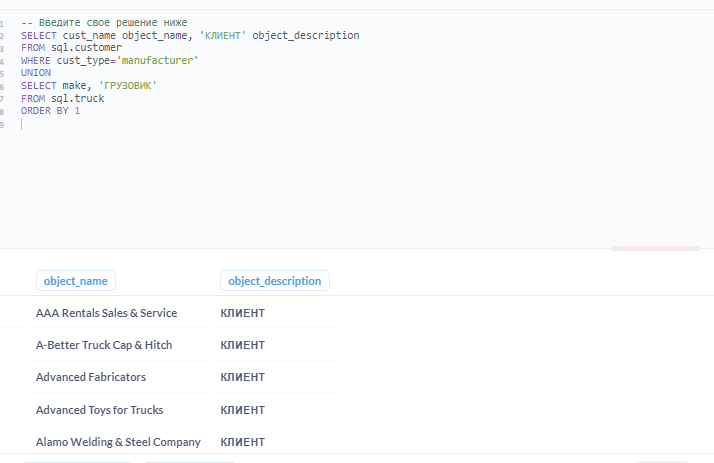